In [345]:
import numpy as np
from math import sin, cos, pi
import matplotlib.pyplot as plt
from scipy.stats import qmc
import yfinance as yf
from datetime import datetime
%matplotlib widget

['QQQ', '2021-01-01', '2021-12-01', '1d']
1.558538933458392x+1.6447918810751723±0.67431834541254
['QQQ', '2022-01-01', '2022-12-01', '1h']
1.2906289534603663x+-1.3132109883851608±0.9233877129226148
['QQQ', '2023-01-01', '2023-12-01', '1h']
1.5592949648021015x+1.5755903934242337±0.3381550525914864


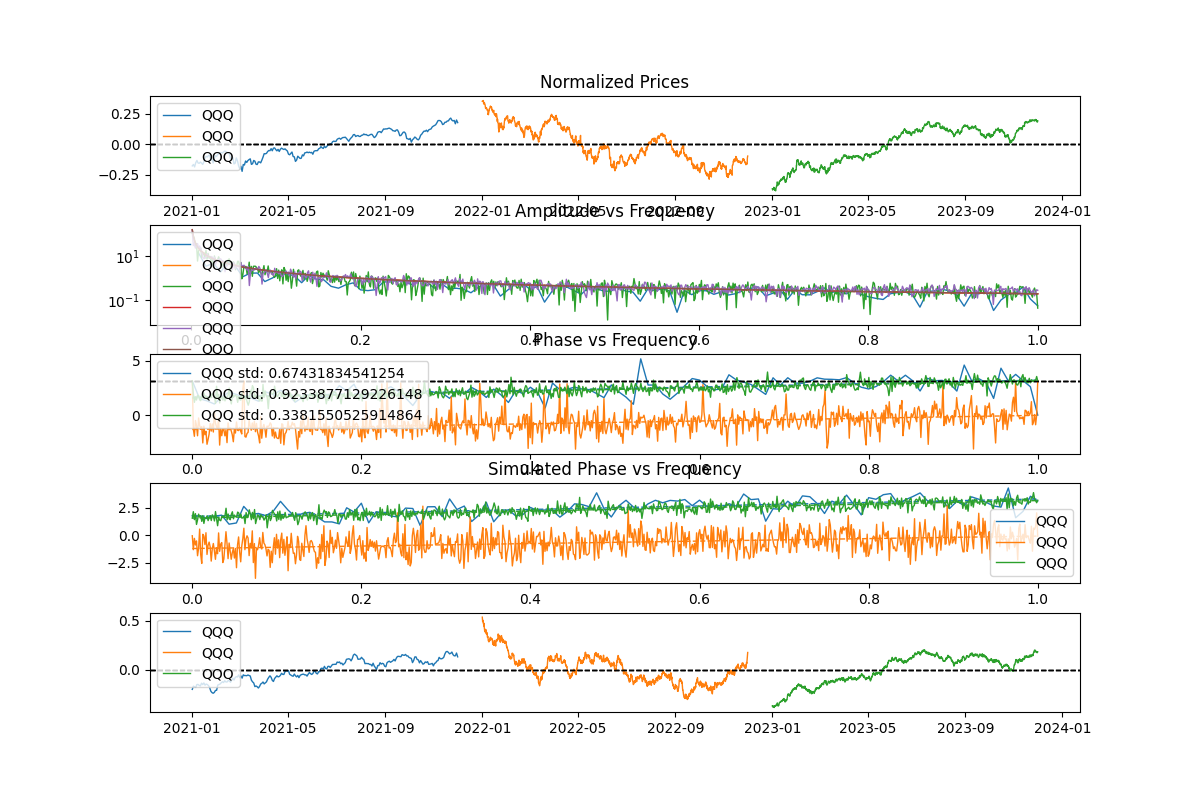

In [743]:
plt.figure(figsize=(12, 8))
plt.tight_layout()
plt.subplots_adjust(hspace=0.3)

tickers = [
    ['QQQ', '2021-01-01', '2021-12-01', '1d'],
    ['QQQ', '2022-01-01', '2022-12-01', '1h'],
    ['QQQ', '2023-01-01', '2023-12-01', '1h'],
    # ['QQQ', '2016-01-01', '2016-12-01', '1d'],
    # ['VOO', '2023-03-01', '2023-06-01', '1h'],
    # ['O', '2015-01-01', '2015-12-01', '1d'],
    # ['O', '2023-01-01', '2023-12-01', '1h'],
    # ['O', '2023-09-01', '2023-12-01', '1h'],
]
for ticker in tickers:
    print(ticker)
    prices = np.array(yf.Ticker(ticker[0]).history(start=ticker[1], end=ticker[2], interval=ticker[3])['Close'])
    prices = prices[~np.isnan(prices)]
    # prices = prices / prices.mean() - 1
    prices = np.log2(prices/prices.mean())
    # prices = (prices) / prices.mean()
    # prices -= 1

    nyquist_freq = (len(prices) // 2) + 1
    spectrum = np.fft.fft(prices)[:nyquist_freq]
    amplitudes = np.abs(spectrum)
    phases = np.angle(spectrum)

    ticker_str = ticker[0]

    plt.subplot(511)
    plt.title('Normalized Prices')
    start_date = datetime.strptime(ticker[1], '%Y-%m-%d')
    end_date = datetime.strptime(ticker[2], '%Y-%m-%d')
    date_array = np.linspace(start_date.timestamp(), end_date.timestamp(), len(prices))
    date_objects = [datetime.fromtimestamp(ts) for ts in date_array]
    plt.plot(date_objects, prices, label=ticker_str, linewidth=1)
    plt.axhline(y=0, color='k', linestyle='--', linewidth=1)
    plt.legend()

    x = np.linspace(0, 1, nyquist_freq)

    plt.subplot(512)
    plt.title('Amplitude vs Frequency')
    plt.plot(x[1:], amplitudes[1:], label=ticker_str, linewidth=1)
    plt.plot(x[1:], 0.2/x[1:], label=ticker_str, linewidth=1)
    plt.yscale('log')
    plt.legend()

    plt.subplot(513)
    plt.title('Phase vs Frequency')
    ((slope, intercept), residuals, _, _, _) = np.polyfit(x, phases, 1, full=True)
    ((slope_mod, intercept_mod), residuals_mod, _, _, _) = np.polyfit(x, phases % (2*np.pi), 1, full=True)
    if(residuals_mod < residuals):
        slope = slope_mod
        intercept = intercept_mod
        residuals = residuals_mod
        phases = phases % (2*np.pi)
    stddev = np.sqrt(residuals[0]/len(phases))
    print(f"{slope}x+{intercept}±{stddev}")
    plt.plot(x, phases, label=f"{ticker_str} std: {stddev}", linewidth=1)
    color = plt.gca().lines[-1].get_color()
    plt.plot(x, slope*x + intercept, color=color, linestyle='--', linewidth=1)
    plt.axhline(y=np.pi, color='k', linestyle='--', linewidth=1)
    plt.legend()

    plt.subplot(514)
    plt.title('Simulated Phase vs Frequency')
    phases_sim = slope*x + np.random.normal(intercept, stddev, size=len(x))
    # phases_sim %= (2*np.pi)
    ((slope_sim, intercept_sim), residuals_sim, _, _, _) = np.polyfit(x, phases_sim, 1, full=True)
    plt.plot(x, phases_sim, label=ticker_str, linewidth=1)
    color = plt.gca().lines[-1].get_color()
    plt.plot(x, slope_sim*x + intercept_sim, color=color, linestyle='--', linewidth=1)
    plt.legend()

    plt.subplot(515)
    spectrum_sim = amplitudes * np.exp(1j * phases_sim)
    # spectrum_sim = np.copy(spectrum)
    if(len(prices)%2==0):
        spectrum_sim = np.concatenate((spectrum_sim[:-1], np.conj(spectrum_sim[-1:0:-1]))) #second half is the negative frequencies, reverse and remove last element, then take last element
    else:
        spectrum_sim = np.concatenate((spectrum_sim, np.conj(spectrum_sim[-1:0:-1])))
    prices_sim = np.fft.ifft(spectrum_sim).real
    plt.plot(date_objects, prices_sim, label=ticker_str, linewidth=1)
    plt.axhline(y=0, color='k', linestyle='--', linewidth=1)
    plt.legend()

['YINN', '2021-03-01', '2021-09-01', '1d']
['YINN', '2021-09-01', '2022-03-01', '1d']
['YINN', '2022-03-01', '2022-09-01', '1d']
['YINN', '2022-09-01', '2023-03-01', '1d']
['YINN', '2023-03-01', '2023-09-01', '1d']


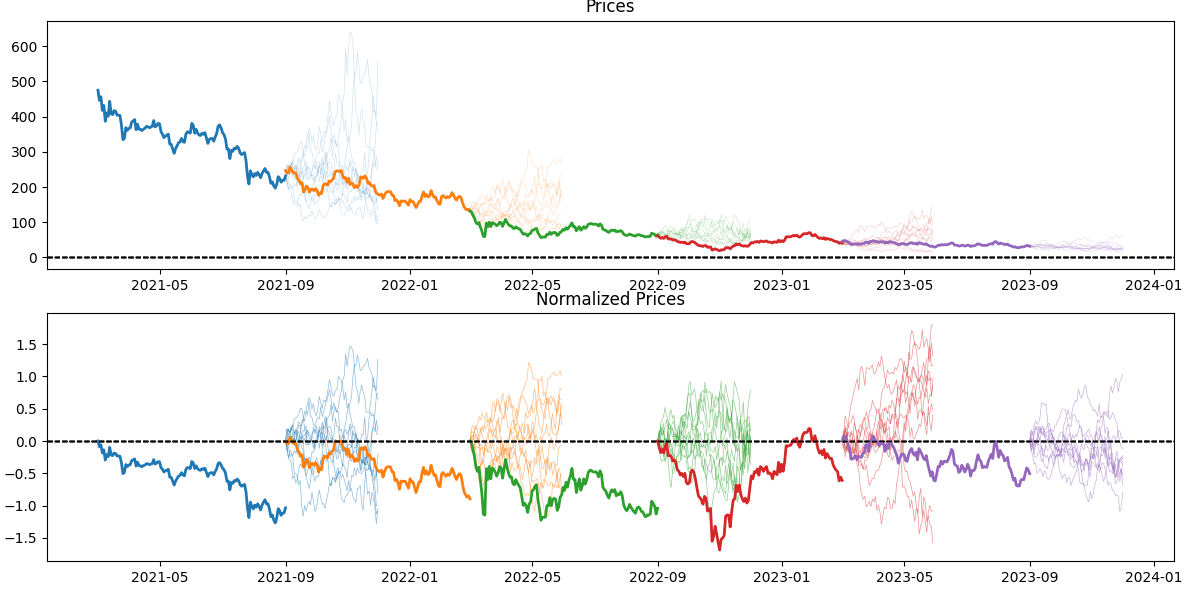

In [866]:
plt.close('all')
fig, axs = plt.subplots(2,1,figsize=(12, 6))
plt.tight_layout()

axs[0].set_title("Prices")
axs[1].set_title("Normalized Prices")

tickers = [
    # ['QQQ', '2021-03-01', '2021-09-01', '1d'],
    # ['QQQ', '2021-09-01', '2022-03-01', '1d'],
    # ['QQQ', '2022-03-01', '2022-09-01', '1d'],
    # ['QQQ', '2022-09-01', '2023-03-01', '1d'],
    # ['QQQ', '2023-03-01', '2023-09-01', '1d'],

    ['YINN', '2021-03-01', '2021-09-01', '1d'],
    ['YINN', '2021-09-01', '2022-03-01', '1d'],
    ['YINN', '2022-03-01', '2022-09-01', '1d'],
    ['YINN', '2022-09-01', '2023-03-01', '1d'],
    ['YINN', '2023-03-01', '2023-09-01', '1d'],

    # ['VOO', '2023-01-01', '2023-12-01', '1h'],
    # ['YINN', '2015-01-01', '2015-12-01', '1d'],
    # ['O', '2016-01-01', '2016-12-01', '1d'],
    # ['O', '2023-09-01', '2023-12-01', '1h'],
]
for ticker in tickers:
    print(ticker)
    ticker_str = ticker[0]

    prices_raw = np.array(yf.Ticker(ticker[0]).history(start=ticker[1], end=ticker[2], interval=ticker[3])['Close'])
    prices_raw = prices_raw[~np.isnan(prices_raw)]
    start_date = datetime.strptime(ticker[1], '%Y-%m-%d')
    end_date = datetime.strptime(ticker[2], '%Y-%m-%d')
    date_array = np.linspace(start_date.timestamp(), end_date.timestamp(), len(prices_raw))
    date_objects = [datetime.fromtimestamp(ts) for ts in date_array]
    date_objects_next = [datetime.fromtimestamp(ts)+(end_date-start_date) for ts in date_array]
    axs[0].plot(date_objects, prices_raw, label=ticker_str, linewidth=2)

    # prices = np.log2(prices_raw / prices_raw.mean())
    prices = np.log2(prices_raw / prices_raw[0])
    axs[1].plot(date_objects, prices, label=ticker_str, linewidth=2)

    nyquist_freq = (len(prices) // 2) + 1
    spectrum = np.fft.fft(prices)[:nyquist_freq]
    amplitudes = np.abs(spectrum)
    phases = np.angle(spectrum)


    for i in range(10):
        phases_sim = np.random.uniform(0, 2*pi, size=nyquist_freq)
        spectrum_sim = amplitudes * np.exp(1j * (phases_sim))
        prices_sim = np.fft.ifft(spectrum_sim).real

        # spectrum_sim[50:] = 0    #low pass filter
        if(len(prices)%2==0):
            spectrum_sim = np.concatenate((spectrum_sim[:-1], np.conj(spectrum_sim[-1:0:-1]))) #second half is the negative frequencies, reverse and remove last element, then take last element
        else:
            spectrum_sim = np.concatenate((spectrum_sim, np.conj(spectrum_sim[-1:0:-1])))
        prices_sim = np.fft.ifft(spectrum_sim).real

        
        halflen = len(prices_sim)//2
        date_objects_next = date_objects_next[:halflen]
        prices_sim = prices_sim[:halflen]

        prices_sim = (prices_sim - prices_sim[0])

        # axs[1].plot(date_objects_next, prices_sim, label=i, linewidth=1, color='blue', alpha=0.5)

        x = np.linspace(1e-6, pi/2, len(prices_sim))
        prices_sim = np.multiply(prices_sim, x/np.sin(x))

        color = axs[1].lines[-1].get_color()
        axs[1].plot(date_objects_next, prices_sim, label=i, linewidth=0.5, color=color, alpha=0.5)


        prices_predict = prices_raw[-1]*np.exp2(prices_sim)
        # prices_predict = prices_raw[-1]*np.power(3, prices_sim)
        axs[0].plot(date_objects_next, prices_predict, label=i, linewidth=0.5, color=color, alpha=0.2)
        
    axs[0].axhline(y=0, color='k', linestyle='--', linewidth=1)
    axs[1].axhline(y=0, color='k', linestyle='--', linewidth=1)
    # axs[0].legend()




['QQQ', '2021-06-01', '2022-06-01', '1d']
['QQQ', '2022-01-01', '2022-12-01', '1d']
['QQQ', '2022-06-01', '2023-06-01', '1d']
['QQQ', '2023-01-01', '2023-12-01', '1d']


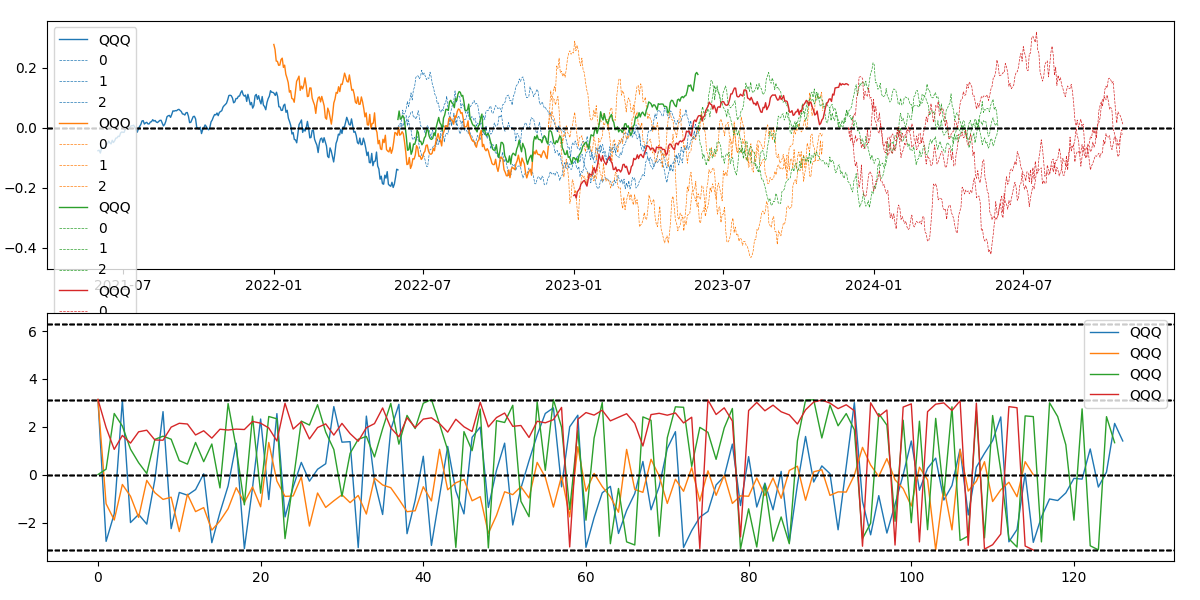

In [781]:
plt.close('all')
fig, axs = plt.subplots(2,1,figsize=(12, 6))
plt.tight_layout()

tickers = [
    ['QQQ', '2021-06-01', '2022-06-01', '1d'],
    ['QQQ', '2022-01-01', '2022-12-01', '1d'],
    ['QQQ', '2022-06-01', '2023-06-01', '1d'],
    # ['QQQ', '2016-01-01', '2016-12-01', '1d'],
    ['QQQ', '2023-01-01', '2023-12-01', '1d'],
    # ['VOO', '2023-01-01', '2023-12-01', '1h'],
    # ['YINN', '2015-01-01', '2015-12-01', '1d'],
    # ['O', '2016-01-01', '2016-12-01', '1d'],
    # ['O', '2023-09-01', '2023-12-01', '1h'],
]
for ticker in tickers:
    print(ticker)
    prices = np.array(yf.Ticker(ticker[0]).history(start=ticker[1], end=ticker[2], interval=ticker[3])['Close'])
    prices = prices[~np.isnan(prices)]
    # prices = prices / prices[-1] - 1
    prices = prices / prices.mean() - 1
    # prices = (prices) / prices.mean()
    # prices -= 1

    nyquist_freq = (len(prices) // 2) + 1
    spectrum = np.fft.fft(prices)[:nyquist_freq]
    amplitudes = np.abs(spectrum)
    phases = np.angle(spectrum)
    # phases[0] = 0 #shouldn't matter but it is sometimes 0, sometimes 3.14
    # phases %= (2*np.pi)

    ticker_str = ticker[0]

    start_date = datetime.strptime(ticker[1], '%Y-%m-%d')
    end_date = datetime.strptime(ticker[2], '%Y-%m-%d')
    date_array = np.linspace(start_date.timestamp(), end_date.timestamp(), len(prices))
    date_objects = [datetime.fromtimestamp(ts) for ts in date_array]
    date_objects_next = [datetime.fromtimestamp(ts)+(end_date-start_date) for ts in date_array]

    axs[0].plot(date_objects, prices, label=ticker_str, linewidth=1)
    axs[1].plot(phases, linewidth=1, label=ticker_str)
    axs[1].axhline(y=0, color='k', linestyle='--', linewidth=1)
    axs[1].axhline(y=-pi, color='k', linestyle='--', linewidth=1)
    axs[1].axhline(y=pi, color='k', linestyle='--', linewidth=1)
    axs[1].axhline(y=2*pi, color='k', linestyle='--', linewidth=1)

    x = np.linspace(0, 1, nyquist_freq)

    ((slope, intercept), residuals, _, _, _) = np.polyfit(x, phases, 1, full=True)
    ((slope_mod, intercept_mod), residuals_mod, _, _, _) = np.polyfit(x, phases % (2*np.pi), 1, full=True)
    if(residuals_mod < residuals):
        slope = slope_mod
        intercept = intercept_mod
        residuals = residuals_mod
        phases = phases % (2*np.pi)
    stddev = np.sqrt(residuals[0]/len(phases))

    for i in range(3):
        # phases_sim = slope*x + np.random.normal(intercept, stddev, size=len(x))
        # phases_sim[0] = 0
        phases_sim = np.random.uniform(0, 2*pi, size=len(x))
        # axs[1].plot(phases_sim, linewidth=1, label=i)
        # phases_sim %= (2*np.pi)
        for offset in [0]:
            spectrum_sim = amplitudes * np.exp(1j * (phases_sim+offset))
            if(len(prices)%2==0):
                spectrum_sim = np.concatenate((spectrum_sim[:-1], np.conj(spectrum_sim[-1:0:-1]))) #second half is the negative frequencies, reverse and remove last element, then take last element
            else:
                spectrum_sim = np.concatenate((spectrum_sim, np.conj(spectrum_sim[-1:0:-1])))
            prices_sim = np.fft.ifft(spectrum_sim).real
            prices_sim = prices_sim - prices_sim[0]
            # prices_sim = prices_sim * (prices[-1]+1)
            color = axs[0].lines[-1].get_color()
            axs[0].plot(date_objects_next[:], prices_sim[:], label=i, linewidth=0.5, color=color, linestyle='--')
        
    axs[0].axhline(y=0, color='k', linestyle='--', linewidth=1)
    axs[0].legend()
    axs[1].legend()





Average of money-log: -3.0592494851077237


Text(0, 0.5, 'Frequency')

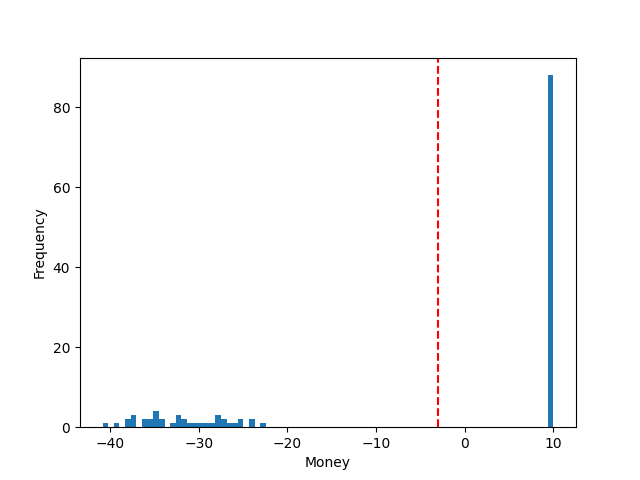

In [33]:
T = len(prices) #number of time steps
n = nyquist_freq #number of fourier terms
# As = 1 / np.arange(1,n+1) #amplitudes of fourier terms
As = np.abs(spectrum) #amplitudes of fourier terms
start_price = prices[0]

thresS = 1
thresB = -1
sell_max = 20
buy_max= 20

trials = 2**7
thetass = qmc.Sobol(d=n).random(trials) * 2*pi

money_log = []
for trial in range(trials):
    # thetas = np.random.uniform(0, 2*pi, size=n) #phases of fourier terms
    thetas = thetass[trial]

    offset = -2*pi/T*sum(As*np.sin(thetas)) + start_price

    last_trans = start_price
    invest = 0 #shares
    cash = 10


    P = np.zeros(T)
    for k in range(T):
        t = 2*pi*k/T
        for i in range(n):
            P[k] += As[i]*sin(i*t + thetas[i])
        P[k] *= 2*pi/T
        P[k] += offset

        if(P[k] > last_trans + thresS and invest > 0):
            sell_amt = min(sell_max, invest*P[k])
            invest -= sell_amt/P[k]
            cash += sell_amt
            last_trans = P[k]
        if(P[k] < last_trans + thresB and cash > 0):
            buy_amt = min(buy_max, cash)
            invest += buy_amt/P[k]
            cash -= buy_amt
            last_trans = P[k]

    money_log.append(cash + invest*P[-1])
# money_log = np.array(money_log)

money_log = [x for x in money_log if (x - np.mean(money_log)) / np.std(money_log) < 3]

average_money_log = sum(money_log) / len(money_log)
print(f"Average of money-log: {average_money_log}")

plt.figure()
plt.hist(money_log, bins=80)
plt.axvline(x=average_money_log, color='r', linestyle='--')

plt.xlabel('Money')
plt.ylabel('Frequency')